In [6]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import norm

In [7]:
!pip install yfinance

In [8]:
import yfinance as yf

# Fetch stock data directly using yfinance
B1 = yf.download('NEE', start='2023-01-01', end='2023-03-03')
B2 = yf.download('XOM', start='2023-01-01', end='2023-03-03')
B3 = yf.download('MSFT', start='2023-01-01', end='2023-03-03')
B4 = yf.download('AAPL', start='2023-01-01', end='2023-03-03')
B5 = yf.download('^BVSP', start='2023-01-01', end='2023-03-02')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [29]:
dados = pd.DataFrame({"NextEra Energy":B1['Open']['NEE'].tolist(),"Exxon Mobil Corporation":B2['Open']['XOM'].tolist(),
                      "MICROSOFT":B3['Open']['MSFT'].tolist(),"APPLE":B4['Open']['AAPL'].tolist(),"IBOVESPA":B5['Open']['^BVSP'].tolist()})
dados.head()

,NextEra Energy,Exxon Mobil Corporation,MICROSOFT,APPLE,IBOVESPA
0,79.731435,102.653956,239.155220,128.924245,109734.0
1,79.721976,97.997226,228.529588,125.569527,106377.0
2,79.013206,99.437251,223.531611,125.807022,104167.0
3,78.965954,102.934491,219.399387,124.698692,105336.0
4,79.041570,104.393205,222.793701,129.112286,107642.0


In [10]:
dados.describe()

,NextEra Energy,Exxon Mobil Corporation,MICROSOFT,APPLE,IBOVESPA
count,41.000000,41.000000,41.000000,41.000000,41.000000
mean,73.769654,105.354298,244.164569,141.227710,109668.658537
std,4.558697,2.716452,13.600451,8.695306,2629.816682
min,66.921183,97.997226,219.399387,124.698692,104167.000000
25%,70.498578,104.103456,233.173350,133.426895,107849.000000
50%,71.490845,104.823349,243.995746,143.095657,109599.000000
75%,79.013206,107.394843,254.641114,148.754864,112041.000000
max,81.205672,110.925600,269.379213,152.278660,114271.000000


In [11]:
covariancia_dados = dados.cov()

In [12]:
correlacao_dados = dados.corr()

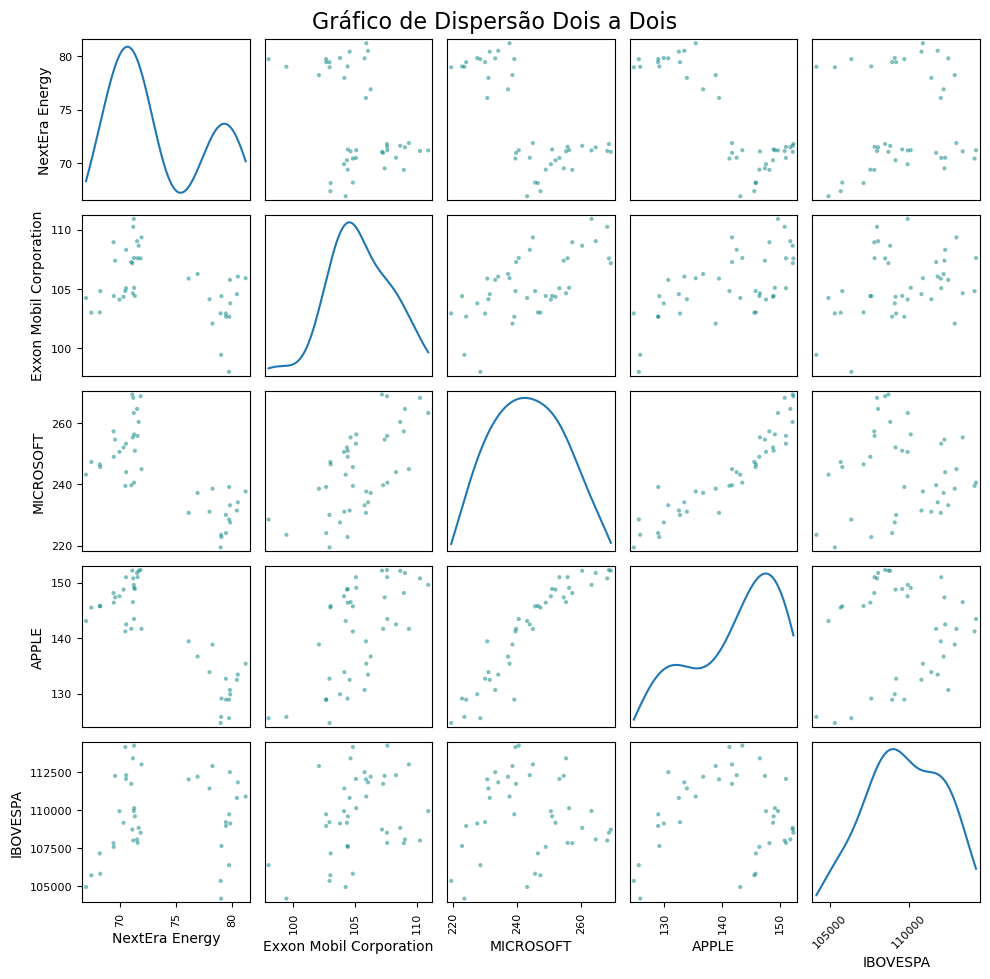

In [13]:
pd.plotting.scatter_matrix(dados,figsize=(10, 10), diagonal='kde', color='teal')

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.suptitle('Gráfico de Dispersão Dois a Dois', fontsize=16)
plt.xticks(fontsize=8, rotation=45)
plt.yticks(fontsize=8)

plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler

# Crie um objeto StandardScaler
scaler = StandardScaler()

# Ajuste o scaler aos dados e normalize-os
dados_normalizados = scaler.fit_transform(dados)
dadosNormais = pd.DataFrame(dados_normalizados)

In [15]:
correlacao_dados

,NextEra Energy,Exxon Mobil Corporation,MICROSOFT,APPLE,IBOVESPA
NextEra Energy,1.000000,-0.419165,-0.720052,-0.848943,0.093290
Exxon Mobil Corporation,-0.419165,1.000000,0.640181,0.625056,0.335128
MICROSOFT,-0.720052,0.640181,1.000000,0.929990,0.013834
APPLE,-0.848943,0.625056,0.929990,1.000000,0.073559
IBOVESPA,0.093290,0.335128,0.013834,0.073559,1.000000


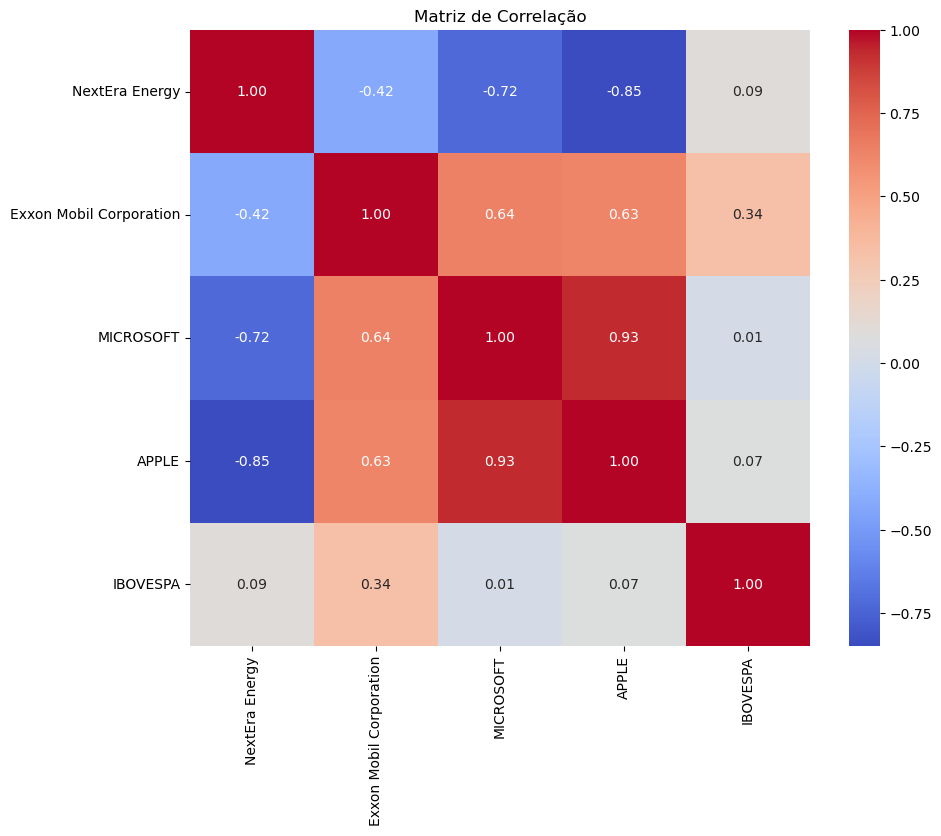

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao_dados, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()